# Vahadane Demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import spams
import cv2
import utils
from vahadane import vahadane
from sklearn.manifold import TSNE

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
SOURCE_PATH = './data/i9.png'
TARGET_PATH = './data/target1.png'
RESULT_PATH = './output/i9_to_target1_normal_f.png'

## Load source and target images

source image size:  (1536, 2048, 3)
target image size:  (300, 300, 3)


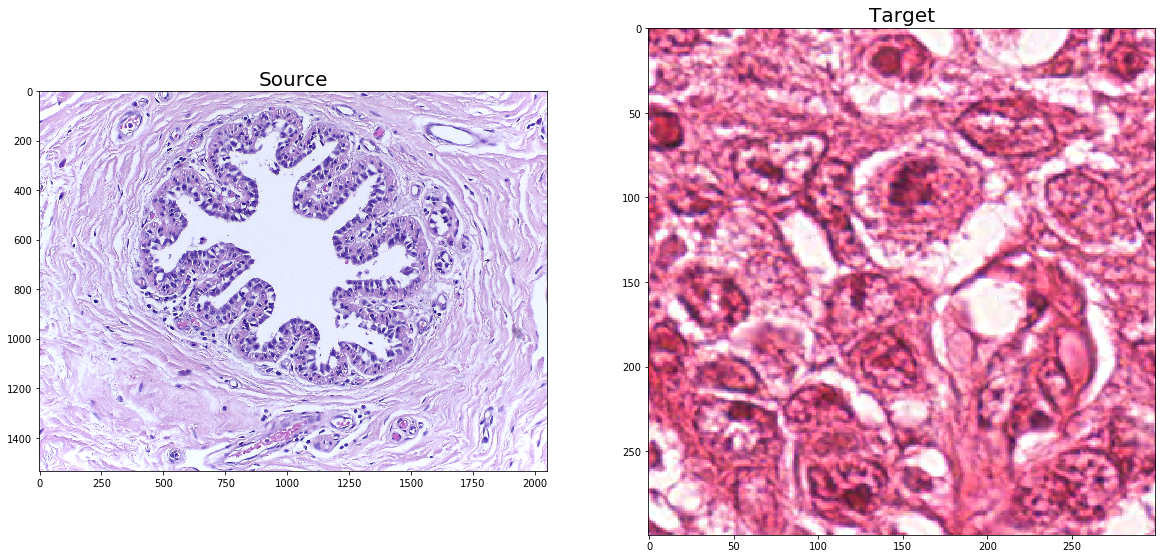

In [3]:
source_image = utils.read_image(SOURCE_PATH)
target_image = utils.read_image(TARGET_PATH)
print('source image size: ', source_image.shape)
print('target image size: ', target_image.shape)
plt.figure(figsize=(20.0, 20.0))
plt.subplot(1, 2, 1)
plt.title('Source', fontsize=20)
plt.imshow(source_image)
plt.subplot(1, 2, 2)
plt.title('Target', fontsize=20)
plt.imshow(target_image)
plt.savefig(RESULT_PATH)
plt.show()

## Configuration

In [4]:
vhd = vahadane(LAMBDA1=0.1, LAMBDA2=0.01, THRESH=0.8, fast_mode=1)
vhd.show_config()

STAIN_NUM = 2
THRESH = 0.8
LAMBDA1 = 0.1
LAMBDA2 = 0.01
ITER = 100
fast_mode = 1
getH_mode = 0


## Stain Separation and Color Normalization

In [1]:
Ws, Hs = vhd.stain_separate(source_image)
#Wt, Ht = vhd.stain_separate(target_image)

NameError: name 'vhd' is not defined

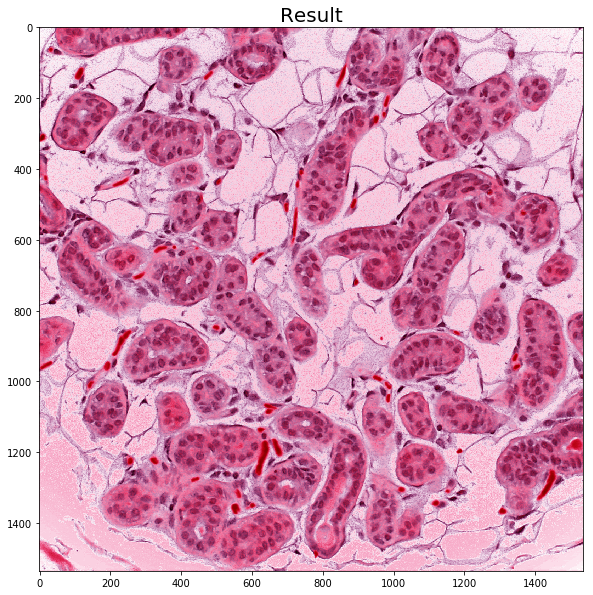

True

In [6]:
img = vhd.SPCN(source_image, Ws, Hs, Wt, Ht)
plt.figure(figsize=(20.0, 10.0))
plt.title('Result', fontsize=20)
plt.imshow(img)
plt.show()
cv2.imwrite(RESULT_PATH, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

In [7]:
tsne = TSNE(n_components=2, init='pca', random_state=19980723)
data = np.concatenate((img[:, :, 0], img[:, :, 1], img[:, :, 2]), axis=0)
print(data.shape)
result = tsne.fit_transform(data.T)
print(result)

(4608, 1536)
[[1931.1447  1184.9044 ]
 [1899.2285  1170.9742 ]
 [1927.2096  1147.8998 ]
 ...
 [ 888.24805 2284.412  ]
 [ 884.9117  2321.7983 ]
 [ 850.7578  2335.4956 ]]


In [8]:
data = np.concatenate((source_image[:,:,0],source_image[:,:,1],source_image[:,:,2]), axis=0)
print(data.shape)
result0 = tsne.fit_transform(data.T)
print(result0)

(4608, 1536)
[[1333.8749   915.7333 ]
 [1353.7616   902.8205 ]
 [1329.5056   888.74445]
 ...
 [ 472.08603 1664.7388 ]
 [ 450.80087 1678.0713 ]
 [ 467.83316 1697.242  ]]


(1536, 2)
[[0.8646546  0.73366773]
 [0.857676   0.73044324]
 [0.8637942  0.72510207]
 ...
 [0.63662136 0.9881754 ]
 [0.63589185 0.99682945]
 [0.628424   1.        ]]
[[0.8478172  0.7541708 ]
 [0.8537841  0.75012934]
 [0.84650624 0.7457237 ]
 ...
 [0.58924186 0.9885976 ]
 [0.58285534 0.99277043]
 [0.5879658  0.99877053]]


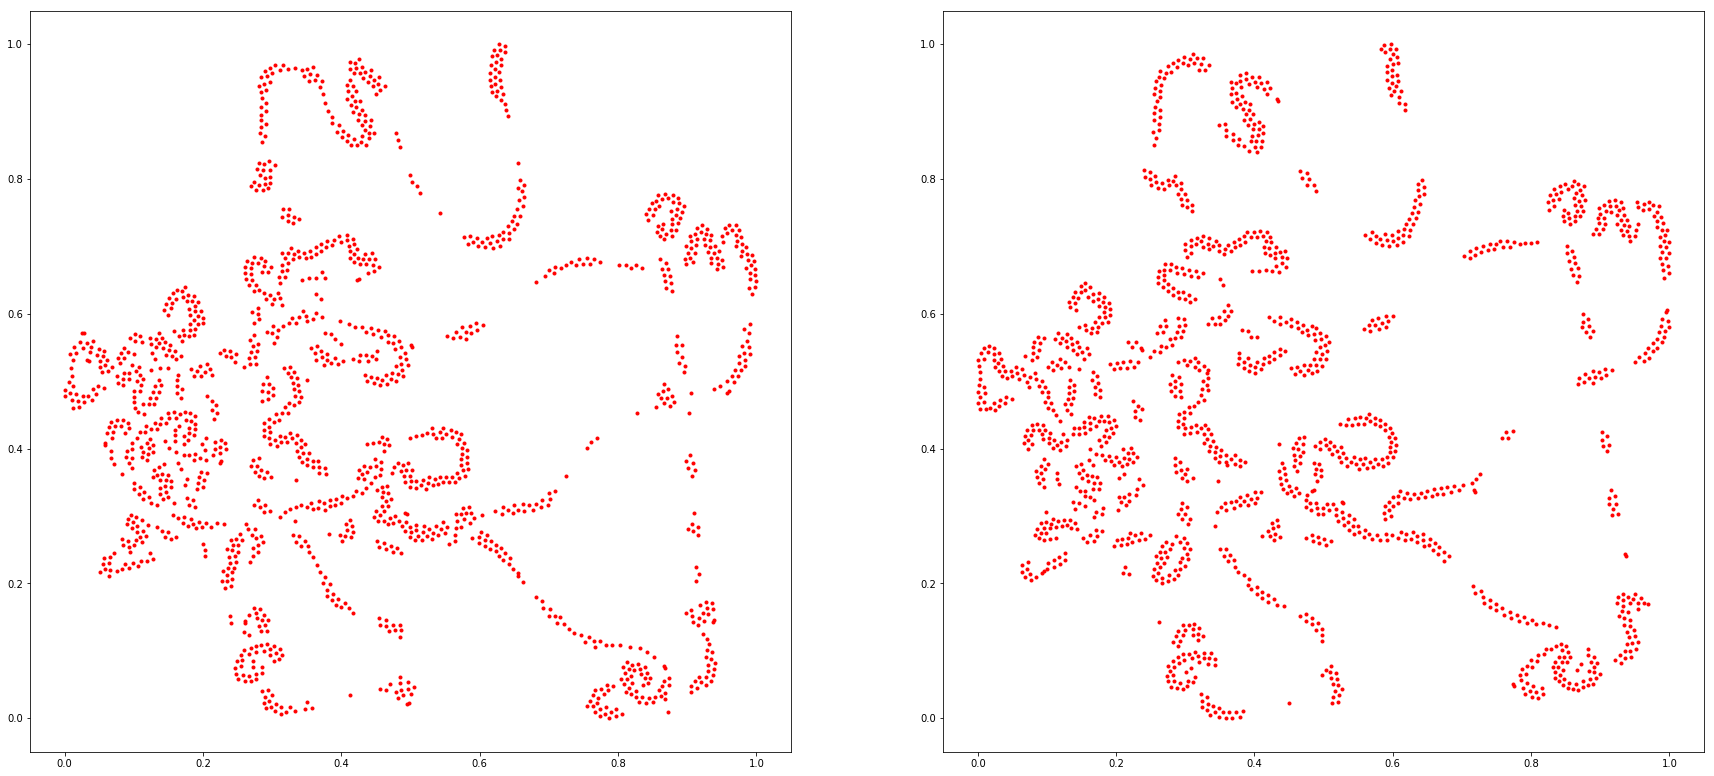

In [10]:
print(result.shape)
t_min = result.min(axis=0)
t_max = result.max(axis=0)
result = (result - t_min) / (t_max - t_min)
t_min = result0.min(axis=0)
t_max = result0.max(axis=0)
result0 = (result0 - t_min) / (t_max - t_min)
print(result)
print(result0)
plt.figure(figsize=(30, 30))
plt.subplot(2,2,1)
plt.plot(result[:, 0], result[:, 1], 'r.')
plt.subplot(2,2,2)
plt.plot(result0[:,0], result0[:,1], 'r.')
plt.show()